<a href="https://colab.research.google.com/github/Rahul-designs/Python-Projects/blob/main/Strategy_backtest(mild_gapdown).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Strategy:- Buy when the mild Gap Down(price opens below the yesterdays close price) opening between -1% and -2 


In [ ]:
import pandas_datareader as pdr

# Get the data for HDFC Bank in Yahoo finance
data = pdr.get_data_yahoo('HDFCBANK.NS', '2011-1-1', '2021-5-10')

# Print last 2 rows of the data
data.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-10,1430.000000,1412.800049,1427.0,1419.849976,5530025.0,1419.849976
2021-05-11,1424.199951,1395.050049,1396.0,1403.550049,7259517.0,1403.550049


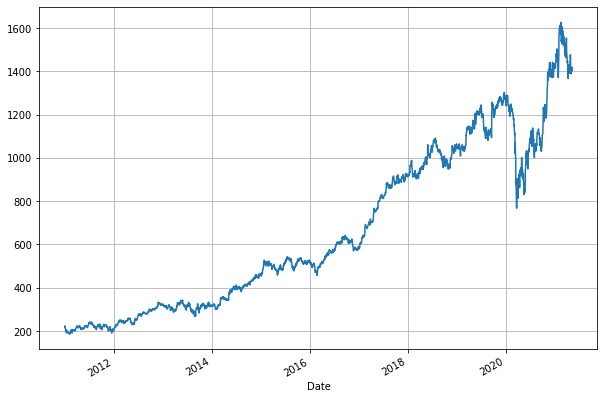

In [ ]:
# Plot the Close Price

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Call the plot method
data['Adj Close'].plot(figsize=(10, 7), grid=True)
plt.show()

In [ ]:
# Compute the percentage change
# Overnight Returns = {Open - PreviousClose}{Previous Close} 
# Intraday Returns = {Close - Open}/{Open} 

# Previous day close to today's open
data['overnight_returns'] = (
    data['Open']-data['Close'].shift(1))/data['Close'].shift(1)

#shift 1 shift 1 shifts the price to previous one
# Open to Close

data['intraday_returns'] = (data['Close']-data['Open'])/data['Open']

data.head(3)

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns
Date,,,,,,,,
2011-01-03,239.964996,235.039993,237.000000,239.050003,5398390.0,223.205643,NaN,0.008650
2011-01-04,238.800003,233.300003,238.649994,234.554993,8284130.0,219.008545,-0.001673,-0.017159
2011-01-05,234.970001,229.750000,234.970001,230.820007,7825920.0,215.521133,0.001769,-0.017662


In [ ]:
# Define your conditions on which you want to trade
import numpy as np

cond_1 = data.overnight_returns < -0.01
cond_2 = data.overnight_returns > -0.02

# Store it in the signal columns of dataframe data

# np.where is similar to if-else it evaluates the condition

data['signal'] = np.where(cond_1 & cond_2, 1, 0)

data.head()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
Date,,,,,,,,,
2011-01-03,239.964996,235.039993,237.000000,239.050003,5398390.0,223.205643,NaN,0.008650,0
2011-01-04,238.800003,233.300003,238.649994,234.554993,8284130.0,219.008545,-0.001673,-0.017159,0
2011-01-05,234.970001,229.750000,234.970001,230.820007,7825920.0,215.521133,0.001769,-0.017662,0
2011-01-06,234.264999,230.899994,231.600006,232.774994,5435090.0,217.346527,0.003379,0.005073,0
2011-01-07,232.619995,226.100006,232.619995,226.945007,7948010.0,211.902969,-0.000666,-0.024396,0


In [ ]:
data.loc[data.signal==1].head()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
Date,,,,,,,,,
2011-02-11,206.000000,199.500000,199.500000,205.929993,10103420.0,192.280853,-0.010343,0.032231,1
2011-02-24,211.854996,204.574997,208.699997,205.910004,10027770.0,192.262161,-0.012819,-0.013368,1
2011-03-11,221.699997,217.500000,218.205002,218.634995,6553950.0,204.143707,-0.011932,0.001971,1
2011-04-11,233.755005,228.860001,232.520004,229.604996,11208180.0,214.386642,-0.011563,-0.012537,1
2011-06-02,236.669998,234.500000,235.505005,236.029999,6722760.0,221.912598,-0.017993,0.002229,1


In [ ]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
count,2548.000000,2548.000000,2548.000000,2548.000000,2.548000e+03,2548.000000,2547.000000,2548.000000,2548.000000
mean,680.479348,666.949879,674.172294,673.851064,6.099130e+06,661.969323,0.001018,-0.000192,0.033752
std,375.865029,368.404943,372.604815,372.052542,6.328215e+06,376.906081,0.008122,0.013701,0.180626
min,203.500000,198.139999,199.500000,200.285004,0.000000e+00,187.010010,-0.099960,-0.109746,0.000000
25%,335.881241,328.093758,332.350006,332.281242,2.813840e+06,316.627090,-0.002335,-0.007223,0.000000
50%,551.024994,542.500000,547.500000,547.399994,4.573372e+06,531.382812,0.000843,-0.000510,0.000000
75%,1010.500000,993.006256,1003.299988,1002.037506,7.437424e+06,993.896851,0.003972,0.006754,0.000000
max,1641.000000,1608.449951,1621.199951,1626.650024,2.011300e+08,1626.650024,0.088184,0.112012,1.000000


In [ ]:
data.loc[data.signal==1].describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,signal
count,86.000000,86.000000,86.000000,86.000000,8.600000e+01,86.000000,86.000000,86.000000,86.0
mean,682.057327,662.981511,671.618371,671.907094,9.930010e+06,661.837025,-0.013585,0.001520,1.0
std,429.478761,418.543202,424.024979,422.887245,7.714532e+06,428.474262,0.002703,0.016752,0.0
min,206.000000,199.500000,199.500000,205.910004,1.522426e+06,192.262161,-0.019967,-0.042508,1.0
25%,313.237503,296.425011,308.400002,299.437508,5.281246e+06,286.120171,-0.015670,-0.008756,1.0
50%,527.112488,507.475006,514.250000,517.062485,8.505330e+06,501.885239,-0.013057,0.002715,1.0
75%,1064.775024,1039.250000,1040.750000,1052.931274,1.168223e+07,1044.103699,-0.011180,0.011199,1.0
max,1618.250000,1548.000000,1587.050049,1597.599976,5.406435e+07,1597.599976,-0.010009,0.038308,1.0


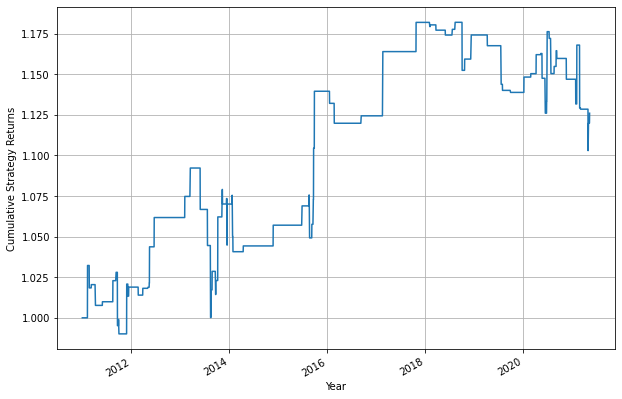

In [ ]:
# Compute the strategy returns
strategy_returns = data.signal * data.intraday_returns
# Plot the cumulative strategy returns this show how the compounding takes places
(strategy_returns+1).cumprod().plot(figsize=(10, 7), grid=True)
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()

In [ ]:
pip install pyfolio


Start date,2011-01-03
End date,2021-05-11
Total months,121
,Backtest
Annual return,1.2%
Cumulative returns,12.6%
Annual volatility,4.9%
Sharpe ratio,0.27
Calmar ratio,0.14
Stability,0.77
Max drawdown,-8.4%


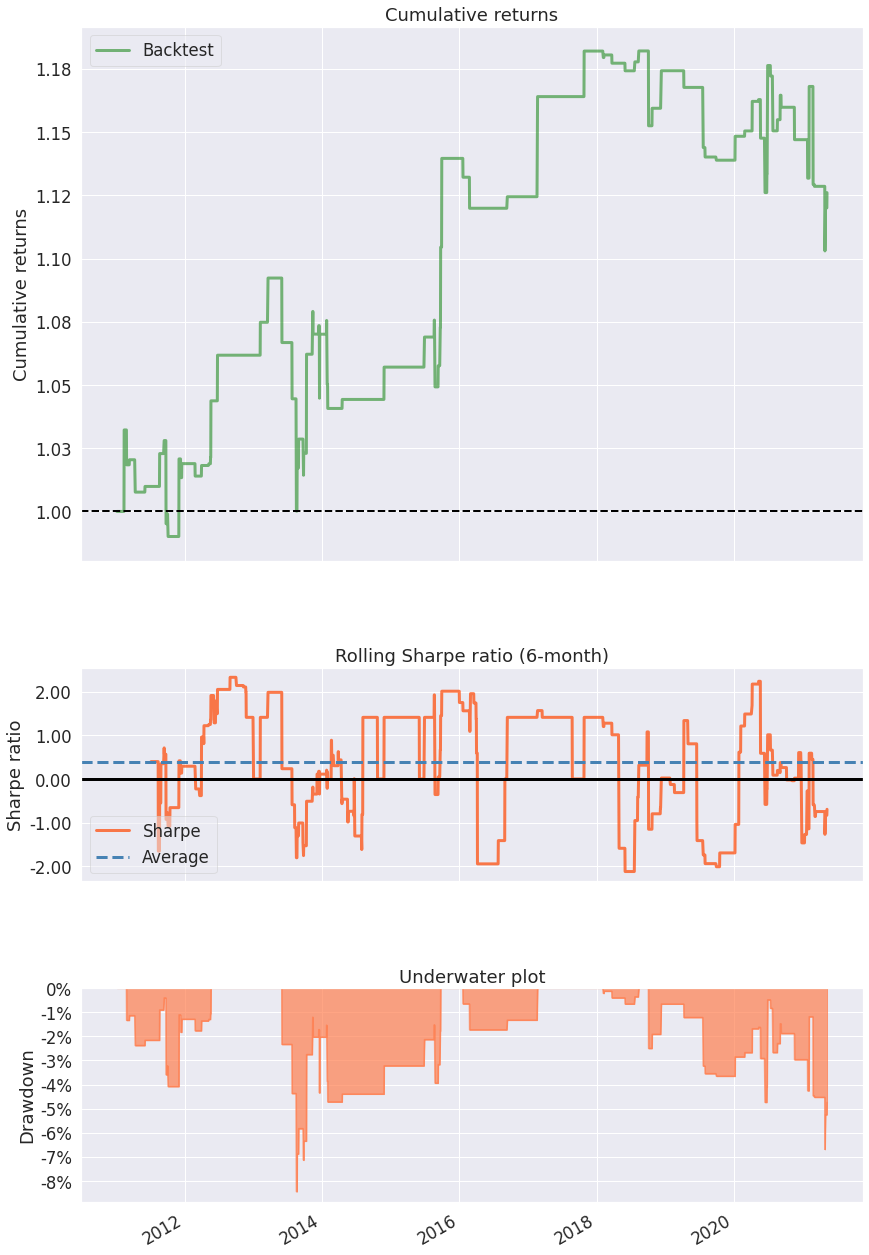

In [ ]:

# Detailed performance analysis
import pyfolio as pf
pf.create_simple_tear_sheet(strategy_returns)